In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD, Adam

In [41]:
data_weather=pd.read_csv('weatherHistory.csv')
data_weather.head

<bound method NDFrame.head of                       Formatted Date  ...                           Daily Summary
0      2006-04-01 00:00:00.000 +0200  ...       Partly cloudy throughout the day.
1      2006-04-01 01:00:00.000 +0200  ...       Partly cloudy throughout the day.
2      2006-04-01 02:00:00.000 +0200  ...       Partly cloudy throughout the day.
3      2006-04-01 03:00:00.000 +0200  ...       Partly cloudy throughout the day.
4      2006-04-01 04:00:00.000 +0200  ...       Partly cloudy throughout the day.
...                              ...  ...                                     ...
96448  2016-09-09 19:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96449  2016-09-09 20:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96450  2016-09-09 21:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96451  2016-09-09 22:00:00.000 +0200  ...  Partly cloudy starting in the morning.
96452  2016-09-09 23:00:00.000 +0200  ...  Partly cloudy starting in

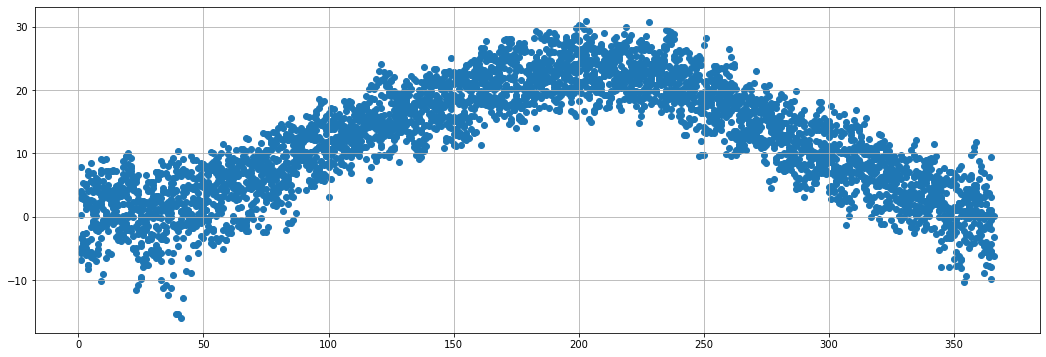

In [42]:
data_weather['Formatted Date'] = pd.to_datetime(data_weather['Formatted Date'], utc=True)
data_weather['day_of_year'] = data_weather['Formatted Date'].dt.dayofyear
weather = data_weather.set_index('Formatted Date').groupby(pd.Grouper(freq='d')).mean().dropna(how='all')
day_w = weather[['Temperature (C)', 'day_of_year']].copy()
day_w.groupby('day_of_year')
plt.figure(figsize=(18,6)) 
plt.scatter(day_w['day_of_year'],day_w['Temperature (C)'], marker='o')
plt.grid()

In [43]:
X_train = np.array(data_weather['day_of_year'])
Y_train = np.array(data_weather['Temperature (C)'])
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

In [49]:
import tensorflow as tf
model = tf.keras.models.Sequential([
        Dense(128, input_dim = 1, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='relu'),
])

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.MeanAbsoluteError(reduction="auto", name="MeanAbsoluteError"))

In [55]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
2412/2412 [==============================] - 9s 3ms/step - loss: 4.2222
Epoch 2/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2212
Epoch 3/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2264
Epoch 4/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2239
Epoch 5/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2230
Epoch 6/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2204
Epoch 7/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2245
Epoch 8/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2264
Epoch 9/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2242
Epoch 10/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2259
Epoch 11/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2254
Epoch 12/20
2412/2412 [==============================] - 8s 3ms/step - loss: 4.2233
E

In [48]:
y_pred = model.predict(X_test)